<a href="https://colab.research.google.com/github/bmurmann/ADC-survey/blob/main/plots/energy_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ADC Survey: Energy Plot

In [2]:
# from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Read latest survey data and concatenate ISSCC and VLSI data
data = "https://github.com/bmurmann/ADC-survey/blob/main/xls/ADCsurvey_latest.xlsx?raw=true"
df1 = pd.read_excel(data, sheet_name='ISSCC')
df2 = pd.read_excel(data, sheet_name='VLSI')
df = pd.concat([df1, df2])

In [5]:
# Show headers of data table
print(df.keys())

Index(['YEAR', 'ID', 'TYPE', 'ARCHITECTURE', 'TECHNOLOGY', 'TITLE', 'ABSTRACT',
       'AUTHORS', 'DOI', 'LINK', 'COMMENTS', 'VSUP1 [V]', 'VSUP2 [V]',
       'VSUP3 [V]', 'Csamp [pF]', 'AREA [mm^2]', 'SNDR_lf [dB]', 'fin_hf [Hz]',
       'SNDR_hf [dB]', 'SNR [dB]', 'DR [dB]', '-THD [dB]', 'SFDR [dB]',
       'SNDR_plot [dB]', 'P [W]', 'fs [Hz]', 'OSR', 'fsnyq [Hz]',
       'fcenter [Hz]', 'P/fsnyq [pJ]', 'FOMW_lf [fJ/conv-step]',
       'FOMW_hf [fJ/conv-step]', 'FOMS_lf [dB]', 'FOMS_hf [dB]',
       'FOMW_hf/fsnyq', 'FOMS,hf+10log(fsnyq)'],
      dtype='object')


In [5]:
# Compute envelope for energy plot
smallest_three_p_fs = sorted(df['P/fsnyq [pJ]'])[:3]
p_fs_min = np.mean(smallest_three_p_fs)
enob = (df['SNDR_plot [dB]'] - 1.76)/6.02
k = df['P/fsnyq [pJ]'] / 4**enob
smallest_three_k = sorted(k)[:3]
k_min = np.mean(smallest_three_k)
env_x = np.linspace(10, 130, 100)
env_y = p_fs_min + k_min*4**((env_x-1.76)/6.02)

In [6]:
# Decent settings for a PowerPoint figure
font=16
size=(8, 5)

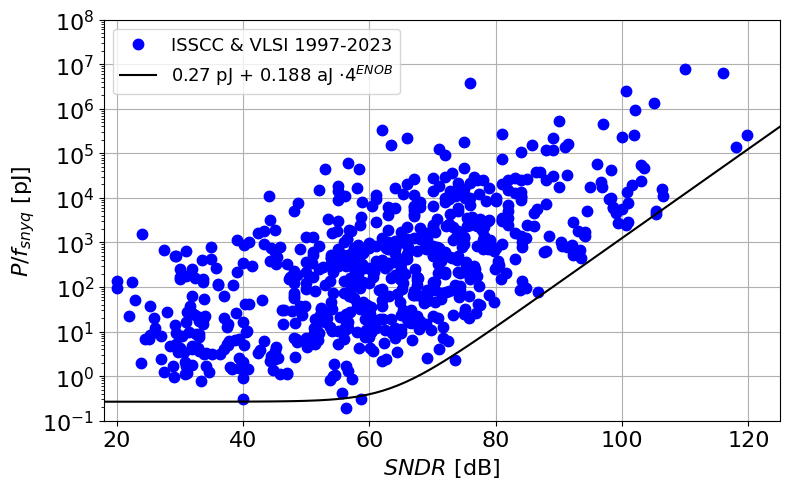

In [9]:
fig, ax = plt.subplots(figsize=size)
ax.plot(df['SNDR_plot [dB]'], df['P/fsnyq [pJ]'], 'b.', ms=15, label='ISSCC & VLSI 1997-%d' %max(df['YEAR']))
ax.plot(env_x, env_y, 'k', label='%.2f pJ + %.3f aJ $\cdot 4^{ENOB}$' %(p_fs_min, k_min/1e12/1e-18))
ax.legend(frameon=1, fontsize=font-3, loc='upper left')
ax.set_yscale('log')
ax.set_xlim((18, 125))
ax.set_ylim((1e-1, 1e8))
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.xlabel('$SNDR$ [dB]', fontsize=font)
plt.ylabel('$P/f_{snyq}$ [pJ]', fontsize=font)
plt.grid(True)
fig.tight_layout()
fig.savefig("energy_plot_vb.png", dpi=600)
plt.show()

In [7]:
# save and download as high-resolution png file
fig.savefig("energy_plot.png", dpi=600)
# files.download('energy_plot.png')

NameError: name 'fig' is not defined